In [1]:
# import data

import re
import pandas as pd
import numpy as np
import sqlite3

# read database, change path and database name if needed
conn = sqlite3.connect('final_db_2.db')
cursor = conn.cursor()
result = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

In [2]:
# find table names - match data
table_names = sorted(list(zip(*result))[0])

# create first table
test_name = table_names[0]
data = pd.read_sql("SELECT * FROM '{}'".format(test_name), conn)

# append all match stats to one table
for name in table_names[1:]:
    data_i = pd.read_sql("SELECT * FROM '{}'".format(name), conn)
    data = pd.concat([data, data_i])

In [3]:
data = data.drop(columns = ['Team_name_home', 'Round_home', 'Team_name_away', 'Year_away', 'Round_away', 
                            'Results_away', 'Round_diff', 'Year_diff', 'Team_name_diff' ]) 
# only need result home 

In [4]:
data[data.isna().any(axis=1)]

,AVG_1_Points_home,AVG_1_Serve_number_home,AVG_1_Serve_errors_home,AVG_1_Serve_aces_home,AVG_1_Serve_%_effic_home,AVG_1_Rec_number_home,AVG_1_Rec_errors_home,AVG_1_Rec_%_pos_home,AVG_1_Rec_%_perf_home,AVG_1_Atack_number_home,...,Last_3_Points_lost_diff,Last_5_Points_diff,Last_5_Matches_won_diff,Last_5_Matches_lost_diff,Last_5_Sets_won_diff,Last_5_Sets_lost_diff,Last_5_Points_won_diff,Last_5_Points_lost_diff,%_points_poss_home,%_points_poss_away
687,55.0,76.0,13.0,4.0,-0.12,45.0,5.0,55.0,31.0,69.0,...,-12.0,3.0,1.0,-1.0,3.0,-3.0,24.0,-12.0,0.50,0.00
695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-25.0,4.0,2.0,-2.0,4.0,-4.0,15.0,-25.0,0.56,0.11
916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,-3.0,-1.0,1.0,-3.0,3.0,-14.0,17.0,0.00,0.50
921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,-3.0,-1.0,1.0,-3.0,3.0,-20.0,17.0,0.00,0.50
925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,-3.0,-1.0,1.0,-3.0,3.0,-13.0,6.0,0.33,0.67
1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-88.0,-3.0,-1.0,0.0,-3.0,-1.0,-98.0,-88.0,0.00,0.50
1298,69.0,104.0,16.0,3.0,-0.12,81.0,5.0,49.0,25.0,108.0,...,8.0,1.0,0.0,0.0,1.0,0.0,13.0,8.0,0.17,0.00
1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,3.0,1.0,-1.0,2.0,-2.0,9.0,-3.0,0.50,0.00
1459,72.0,107.0,26.0,8.0,-14.00,76.0,5.0,47.0,19.0,103.0,...,-13.0,1.0,1.0,-1.0,1.0,-1.0,-8.0,-13.0,0.33,0.17
1460,85.0,104.0,19.0,9.0,-4.00,97.0,6.0,40.0,13.0,136.0,...,-7.0,0.0,0.0,0.0,0.0,0.0,-9.0,-7.0,0.33,0.33


In [5]:
data = data.dropna()
# check missing values for each of the variables
data.isnull().sum()

AVG_1_Points_home           0
AVG_1_Serve_number_home     0
AVG_1_Serve_errors_home     0
AVG_1_Serve_aces_home       0
AVG_1_Serve_%_effic_home    0
                           ..
Last_5_Sets_lost_diff       0
Last_5_Points_won_diff      0
Last_5_Points_lost_diff     0
%_points_poss_home          0
%_points_poss_away          0
Length: 278, dtype: int64

In [6]:
data.head()

,AVG_1_Points_home,AVG_1_Serve_number_home,AVG_1_Serve_errors_home,AVG_1_Serve_aces_home,AVG_1_Serve_%_effic_home,AVG_1_Rec_number_home,AVG_1_Rec_errors_home,AVG_1_Rec_%_pos_home,AVG_1_Rec_%_perf_home,AVG_1_Atack_number_home,...,Last_3_Points_lost_diff,Last_5_Points_diff,Last_5_Matches_won_diff,Last_5_Matches_lost_diff,Last_5_Sets_won_diff,Last_5_Sets_lost_diff,Last_5_Points_won_diff,Last_5_Points_lost_diff,%_points_poss_home,%_points_poss_away
0,56.0,85.0,17.0,0.0,-0.20,87.0,7.0,55.0,28.0,115.0,...,32.0,-2.0,-1.0,1.0,0.0,2.0,37.0,32.0,0.11,0.33
1,33.0,55.0,10.0,3.0,-0.13,55.0,5.0,61.0,27.0,68.0,...,-26.0,-2.0,-1.0,1.0,-3.0,1.0,-49.0,-26.0,0.00,0.33
2,33.0,55.0,14.0,2.0,-0.22,58.0,5.0,44.0,22.0,72.0,...,-28.0,-1.0,0.0,0.0,-2.0,0.0,-47.0,-28.0,0.00,0.17
3,71.0,106.0,15.0,5.0,-0.09,87.0,2.0,70.0,43.0,138.0,...,60.0,-2.0,-1.0,1.0,-1.0,3.0,32.0,60.0,0.17,0.50
4,71.0,93.0,18.0,10.0,-0.09,81.0,3.0,56.0,38.0,117.0,...,-14.0,1.0,0.0,0.0,0.0,-1.0,-20.0,-14.0,0.50,0.33


In [7]:
# define columns' names
new_col2 = ['AVG_1_Points_home',
 'AVG_1_Serve_number_home',
 'AVG_1_Serve_errors_home',
 'AVG_1_Serve_aces_home',
 'AVG_1_Serve_%_effic_home',
 'AVG_1_Rec_number_home',
 'AVG_1_Rec_errors_home',
 'AVG_1_Rec_%_pos_home',
 'AVG_1_Rec_%_perf_home',
 'AVG_1_Atack_number_home',
 'AVG_1_Atack_error_home',
 'AVG_1_Atack_blocked_home',
 'AVG_1_Atack_%_eff_home',
 'AVG_1_Block_points_home',
 'AVG_1_Points_net_home',
 'AVG_3_Points_home',
 'AVG_3_Serve_number_home',
 'AVG_3_Serve_errors_home',
 'AVG_3_Serve_aces_home',
 'AVG_3_Serve_%_effic_home',
 'AVG_3_Rec_number_home',
 'AVG_3_Rec_errors_home',
 'AVG_3_Rec_%_pos_home',
 'AVG_3_Rec_%_perf_home',
 'AVG_3_Atack_number_home',
 'AVG_3_Atack_error_home',
 'AVG_3_Atack_blocked_home',
 'AVG_3_Atack_%_eff_home',
 'AVG_3_Block_points_home',
 'AVG_3_Points_net_home',
 'AVG_5_Points_home',
 'AVG_5_Serve_number_home',
 'AVG_5_Serve_errors_home',
 'AVG_5_Serve_aces_home',
 'AVG_5_Serve_%_effic_home',
 'AVG_5_Rec_number_home',
 'AVG_5_Rec_errors_home',
 'AVG_5_Rec_%_pos_home',
 'AVG_5_Rec_%_perf_home',
 'AVG_5_Atack_number_home',
 'AVG_5_Atack_error_home',
 'AVG_5_Atack_blocked_home',
 'AVG_5_Atack_%_eff_home',
 'AVG_5_Block_points_home',
 'AVG_5_Points_net_home',
 'Height_avg_home',
 'Weight_avg_home',
 'Range_avg_home',
 'Opposite_Height_home',
 'Libero_Height_home',
 'Outside_Height_home',
 'Setter_Height_home',
 'Middle_Height_home',
 'Opposite_Weight_home',
 'Libero_Weight_home',
 'Outside_Weight_home',
 'Setter_Weight_home',
 'Middle_Weight_home',
 'Opposite_Range_home',
 'Libero_Range_home',
 'Outside_Range_home',
 'Setter_Range_home',
 'Middle_Range_home',
 'Points_home',
 'Matches_won_home',
 'Matches_lost_home',
 'Sets_won_home',
 'Sets_lost_home',
 'Points_won_home',
 'Points_lost_home',
 'Last_1_Points_home',
 'Last_1_Matches_won_home',
 'Last_1_Matches_lost_home',
 'Last_1_Sets_won_home',
 'Last_1_Sets_lost_home',
 'Last_1_Points_won_home',
 'Last_1_Points_lost_home',
 'Last_3_Points_home',
 'Last_3_Matches_won_home',
 'Last_3_Matches_lost_home',
 'Last_3_Sets_won_home',
 'Last_3_Sets_lost_home',
 'Last_3_Points_won_home',
 'Last_3_Points_lost_home',
 'Last_5_Points_home',
 'Last_5_Matches_won_home',
 'Last_5_Matches_lost_home',
 'Last_5_Sets_won_home',
 'Last_5_Sets_lost_home',
 'Last_5_Points_won_home',
 'Last_5_Points_lost_home',
 'ID',
 'Year_home',
 'Results_home',
 'AVG_1_Points_away',
 'AVG_1_Serve_number_away',
 'AVG_1_Serve_errors_away',
 'AVG_1_Serve_aces_away',
 'AVG_1_Serve_%_effic_away',
 'AVG_1_Rec_number_away',
 'AVG_1_Rec_errors_away',
 'AVG_1_Rec_%_pos_away',
 'AVG_1_Rec_%_perf_away',
 'AVG_1_Atack_number_away',
 'AVG_1_Atack_error_away',
 'AVG_1_Atack_blocked_away',
 'AVG_1_Atack_%_eff_away',
 'AVG_1_Block_points_away',
 'AVG_1_Points_net_away',
 'AVG_3_Points_away',
 'AVG_3_Serve_number_away',
 'AVG_3_Serve_errors_away',
 'AVG_3_Serve_aces_away',
 'AVG_3_Serve_%_effic_away',
 'AVG_3_Rec_number_away',
 'AVG_3_Rec_errors_away',
 'AVG_3_Rec_%_pos_away',
 'AVG_3_Rec_%_perf_away',
 'AVG_3_Atack_number_away',
 'AVG_3_Atack_error_away',
 'AVG_3_Atack_blocked_away',
 'AVG_3_Atack_%_eff_away',
 'AVG_3_Block_points_away',
 'AVG_3_Points_net_away',
 'AVG_5_Points_away',
 'AVG_5_Serve_number_away',
 'AVG_5_Serve_errors_away',
 'AVG_5_Serve_aces_away',
 'AVG_5_Serve_%_effic_away',
 'AVG_5_Rec_number_away',
 'AVG_5_Rec_errors_away',
 'AVG_5_Rec_%_pos_away',
 'AVG_5_Rec_%_perf_away',
 'AVG_5_Atack_number_away',
 'AVG_5_Atack_error_away',
 'AVG_5_Atack_blocked_away',
 'AVG_5_Atack_%_eff_away',
 'AVG_5_Block_points_away',
 'AVG_5_Points_net_away',
 'Height_avg_away',
 'Weight_avg_away',
 'Range_avg_away',
 'Opposite_Height_away',
 'Libero_Height_away',
 'Outside_Height_away',
 'Setter_Height_away',
 'Middle_Height_away',
 'Opposite_Weight_away',
 'Libero_Weight_away',
 'Outside_Weight_away',
 'Setter_Weight_away',
 'Middle_Weight_away',
 'Opposite_Range_away',
 'Libero_Range_away',
 'Outside_Range_away',
 'Setter_Range_away',
 'Middle_Range_away',
 'Points_away',
 'Matches_won_away',
 'Matches_lost_away',
 'Sets_won_away',
 'Sets_lost_away',
 'Points_won_away',
 'Points_lost_away',
 'Last_1_Points_away',
 'Last_1_Matches_won_away',
 'Last_1_Matches_lost_away',
 'Last_1_Sets_won_away',
 'Last_1_Sets_lost_away',
 'Last_1_Points_won_away',
 'Last_1_Points_lost_away',
 'Last_3_Points_away',
 'Last_3_Matches_won_away',
 'Last_3_Matches_lost_away',
 'Last_3_Sets_won_away',
 'Last_3_Sets_lost_away',
 'Last_3_Points_won_away',
 'Last_3_Points_lost_away',
 'Last_5_Points_away',
 'Last_5_Matches_won_away',
 'Last_5_Matches_lost_away',
 'Last_5_Sets_won_away',
 'Last_5_Sets_lost_away',
 'Last_5_Points_won_away',
 'Last_5_Points_lost_away',
 'AVG_1_Points_diff',
 'AVG_1_Serve_number_diff',
 'AVG_1_Serve_errors_diff',
 'AVG_1_Serve_aces_diff',
 'AVG_1_Serve_%_effic_diff',
 'AVG_1_Rec_number_diff',
 'AVG_1_Rec_errors_diff',
 'AVG_1_Rec_%_pos_diff',
 'AVG_1_Rec_%_perf_diff',
 'AVG_1_Atack_number_diff',
 'AVG_1_Atack_error_diff',
 'AVG_1_Atack_blocked_diff',
 'AVG_1_Atack_%_eff_diff',
 'AVG_1_Block_points_diff',
 'AVG_1_Points_net_diff',
 'AVG_3_Points_diff',
 'AVG_3_Serve_number_diff',
 'AVG_3_Serve_errors_diff',
 'AVG_3_Serve_aces_diff',
 'AVG_3_Serve_%_effic_diff',
 'AVG_3_Rec_number_diff',
 'AVG_3_Rec_errors_diff',
 'AVG_3_Rec_%_pos_diff',
 'AVG_3_Rec_%_perf_diff',
 'AVG_3_Atack_number_diff',
 'AVG_3_Atack_error_diff',
 'AVG_3_Atack_blocked_diff',
 'AVG_3_Atack_%_eff_diff',
 'AVG_3_Block_points_diff',
 'AVG_3_Points_net_diff',
 'AVG_5_Points_diff',
 'AVG_5_Serve_number_diff',
 'AVG_5_Serve_errors_diff',
 'AVG_5_Serve_aces_diff',
 'AVG_5_Serve_%_effic_diff',
 'AVG_5_Rec_number_diff',
 'AVG_5_Rec_errors_diff',
 'AVG_5_Rec_%_pos_diff',
 'AVG_5_Rec_%_perf_diff',
 'AVG_5_Atack_number_diff',
 'AVG_5_Atack_error_diff',
 'AVG_5_Atack_blocked_diff',
 'AVG_5_Atack_%_eff_diff',
 'AVG_5_Block_points_diff',
 'AVG_5_Points_net_diff',
 'Height_avg_diff',
 'Weight_avg_diff',
 'Range_avg_diff',
 'Opposite_Height_diff',
 'Libero_Height_diff',
 'Outside_Height_diff',
 'Setter_Height_diff',
 'Middle_Height_diff',
 'Opposite_Weight_diff',
 'Libero_Weight_diff',
 'Outside_Weight_diff',
 'Setter_Weight_diff',
 'Middle_Weight_diff',
 'Opposite_Range_diff',
 'Libero_Range_diff',
 'Outside_Range_diff',
 'Setter_Range_diff',
 'Middle_Range_diff',
 'Points_diff',
 'Matches_won_diff',
 'Matches_lost_diff',
 'Sets_won_diff',
 'Sets_lost_diff',
 'Points_won_diff',
 'Points_lost_diff',
 'Last_1_Points_diff',
 'Last_1_Matches_won_diff',
 'Last_1_Matches_lost_diff',
 'Last_1_Sets_won_diff',
 'Last_1_Sets_lost_diff',
 'Last_1_Points_won_diff',
 'Last_1_Points_lost_diff',
 'Last_3_Points_diff',
 'Last_3_Matches_won_diff',
 'Last_3_Matches_lost_diff',
 'Last_3_Sets_won_diff',
 'Last_3_Sets_lost_diff',
 'Last_3_Points_won_diff',
 'Last_3_Points_lost_diff',
 'Last_5_Points_diff',
 'Last_5_Matches_won_diff',
 'Last_5_Matches_lost_diff',
 'Last_5_Sets_won_diff',
 'Last_5_Sets_lost_diff',
 'Last_5_Points_won_diff',
 'Last_5_Points_lost_diff',
 '%_points_poss_home',
 '%_points_poss_away',
 '%_points_poss_diff']

In [8]:
data['%_points_poss_diff'] = data['%_points_poss_home'] - data['%_points_poss_away']

In [9]:
data.columns = new_col2

In [10]:
# define column with the result
df1 = data.pop('Results_home') 
data['Result']=df1 

In [11]:
in_sample = data[data['Year_home'].isin(['2020/2021', '2019/2020', '2018/2019', '2017/2018', '2016/2017', '2015/2016', '2014/2015', '2013/2014', 
        '2012/2013', '2011/2012', '2010/2011'])]

In [12]:
labels = in_sample.pop('Result')

In [13]:
in_sample = in_sample.drop(columns=['ID', 'Year_home'])

In [14]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(in_sample, labels, test_size = 0.3, random_state = 30)

In [15]:
out_of_time = data[data['Year_home'] == ('2021/2022')]

In [16]:
y_oot = out_of_time['Result']

In [17]:
X_oot = out_of_time.drop(columns=['ID', 'Result', 'Year_home'])

In [18]:
print(y_train.value_counts(normalize=True))  
print(y_test.value_counts(normalize=True))
print(y_oot.value_counts(normalize=True))

Result
1.0    0.53257
0.0    0.46743
Name: proportion, dtype: float64
Result
1.0    0.561475
0.0    0.438525
Name: proportion, dtype: float64
Result
1.0    0.525714
0.0    0.474286
Name: proportion, dtype: float64


In [19]:
print(y_train.value_counts(normalize=False))  
print(y_test.value_counts(normalize=False))
print(y_oot.value_counts(normalize=False))

Result
1.0    605
0.0    531
Name: count, dtype: int64
Result
1.0    274
0.0    214
Name: count, dtype: int64
Result
1.0    92
0.0    83
Name: count, dtype: int64


In [20]:
pl  = pd.DataFrame([['In-sample \ndataset', 0.53257, 'Home win'], 
                    ['In-sample \ndataset', 0.46743, 'Home defeat'], 
                    ['Out-of-sample \ndataset', 0.561475, 'Home win'],
                    ['Out-of-sample \ndataset', 0.438525, 'Home defeat'],
                    ['Out-of-time \ndataset', 0.525714, 'Home win'],
                    ['Out-of-time \ndataset', 0.474286, 'Home defeat'],
                   ], columns = ['Name', 'Value', 'Result'])

In [21]:
pl2 = pd.DataFrame([['In-sample \ndataset', 605, 'Home win'], 
                    ['In-sample \ndataset', 531, 'Home defeat'], 
                    ['Out-of-sample \ndataset', 274, 'Home win'],
                    ['Out-of-sample \ndataset', 214, 'Home defeat'],
                    ['Out-of-time \ndataset', 92, 'Home win'],
                    ['Out-of-time \ndataset', 83, 'Home defeat'],
                   ], columns = ['Name', 'Value', 'Result'])

In [22]:
pl

,Name,Value,Result
0,In-sample \ndataset,0.532570,Home win
1,In-sample \ndataset,0.467430,Home defeat
2,Out-of-sample \ndataset,0.561475,Home win
3,Out-of-sample \ndataset,0.438525,Home defeat
4,Out-of-time \ndataset,0.525714,Home win
5,Out-of-time \ndataset,0.474286,Home defeat


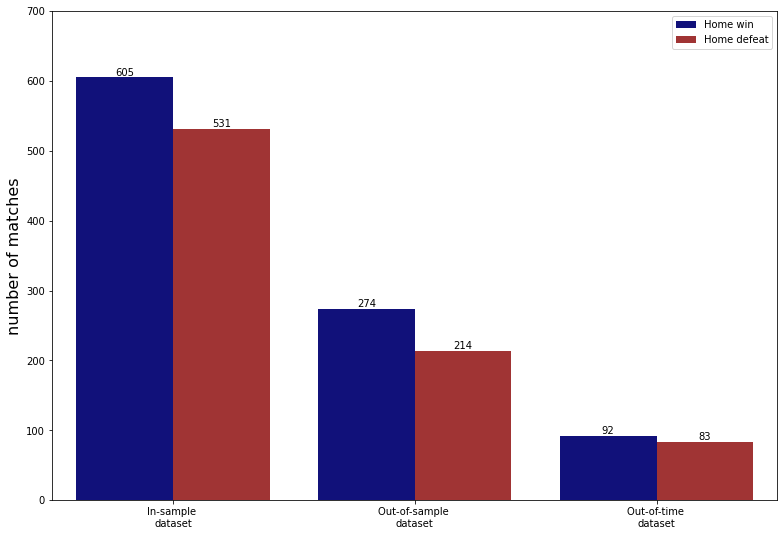

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(13,9))
rrr = sns.barplot(data=pl2, x="Name", y='Value', hue="Result", palette=['darkblue', 'firebrick'])
rrr.set_ylim(0, 700)
rrr.legend_.set_title(None)
rrr.set_xlabel("")
rrr.set_ylabel("number of matches",fontsize=16)
# add values above bars
for container in rrr.containers:
    rrr.bar_label(container, fmt='%.0f')
    


In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from sklearn.metrics import roc_auc_score

In [25]:
# create GBM model
ab_clf = AdaBoostClassifier(random_state=30)

In [26]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(ab_clf, parameters, cv=5, verbose=1, n_jobs=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=30), n_jobs=1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20]},
             verbose=1)

In [27]:
y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

In [58]:
fpr_ts

array([0.        , 0.21962617, 0.22429907, 0.29906542, 0.37850467,
       0.37850467, 0.53738318, 0.56074766, 1.        ])

In [59]:
tpr_ts

array([0.        , 0.63138686, 0.6350365 , 0.7189781 , 0.76642336,
       0.77737226, 0.86131387, 0.87226277, 1.        ])

<ipython-input-57-a97c564d3129>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color = 'black')


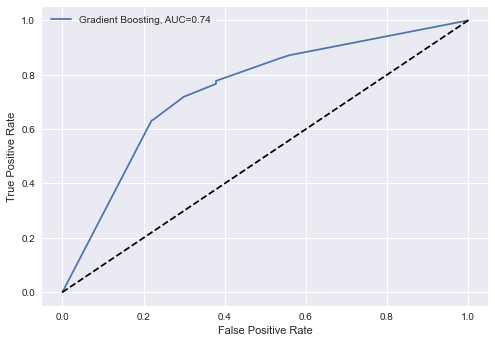

In [57]:
#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

#set up plotting area
plt.figure(0).clf()


plt.plot(fpr_ts,tpr_ts,label="Gradient Boosting, AUC="+str(np.round(roc_auc_test, 2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color = 'black')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#add legend
plt.legend()

In [29]:
# print scores on training and test set
print('In sample set score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Out of sample set score: {:.3f}'.format(clf.score(X_test, y_test)))
print('In sample set auc: {:.3f}'.format(roc_auc_train))
print('Out of sample set auc: {:.3f}'.format(roc_auc_test))

In sample set score: 0.718
Out of sample set score: 0.711
In sample set auc: 0.756
Out of sample set auc: 0.744


In [30]:
y_oot_pred = clf.predict_proba(X_oot)[:,1]

In [31]:
print('Out of time accuracy: {:.4f}'.format(clf.score(X_oot, y_oot)))
print('Out of time set AUC: {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred)))

Out of time accuracy: 0.7486
Out of time set AUC: 0.7672


In [32]:
clf_final = AdaBoostClassifier(random_state=30, n_estimators = 6, learning_rate = 0.1, algorithm = 'SAMME')
clf_final.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=6,
                   random_state=30)

In [33]:
y_oot = y_oot.reset_index(drop=True)
y_oot_pred = pd.Series(y_oot_pred).reset_index(drop=True)

In [34]:
import numpy as np
np.random.seed(1234)
rng=np.random.RandomState(1234)

def get_ci_auc( y_true, y_pred ): 

    from scipy.stats import sem
    from sklearn.metrics import roc_auc_score 
   
    n_bootstraps = 10000 
    bootstrapped_scores = []   
   
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred) - 1, len(y_pred))
       
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)   
 
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

   # 90% c.i.
   # confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
   # confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
 
    # 95% c.i.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
   
    return confidence_lower,confidence_upper

In [35]:
ci_lower, ci_upper = get_ci_auc(y_oot, y_oot_pred)

In [36]:
print('Out of time set AUC: {:.4f}, with confidence interval: {:.4f} - {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred), ci_lower, ci_upper))

Out of time set AUC: 0.7672, with confidence interval: 0.7039 - 0.8377


In [37]:
y_pred_test_all = clf.predict_proba(X_test)

In [38]:
df_plot = pd.DataFrame(y_pred_test_all, columns = ['defeat','win'])
df_plot

,defeat,win
0,0.731059,0.268941
1,0.268941,0.731059
2,0.268941,0.731059
3,0.268941,0.731059
4,0.268941,0.731059
...,...,...
483,0.596151,0.403849
484,0.731059,0.268941
485,0.268941,0.731059
486,0.731059,0.268941


array([[<AxesSubplot: title={'center': 'defeat'}>,
        <AxesSubplot: title={'center': 'win'}>]], dtype=object)

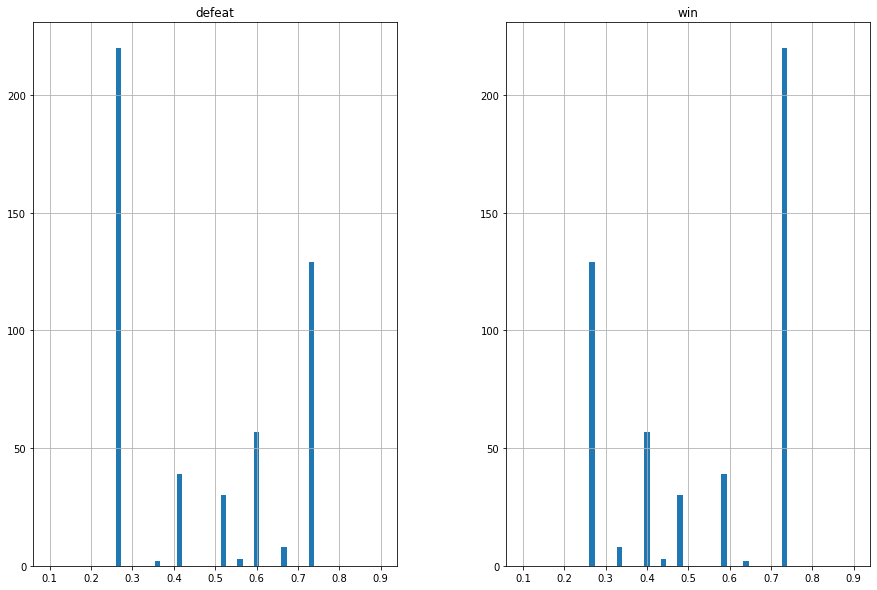

In [39]:
df_plot.hist(bins = 60, figsize=(15, 10), range=[0.1,0.9])

In [40]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(ab_clf, X_train, y_train, cv=10,
                                                        scoring='accuracy', n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 100))

train_mean = np.mean(train_scores, axis=1)
validation_mean = np.mean(test_scores, axis=1)

<ipython-input-41-f15b17680584>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


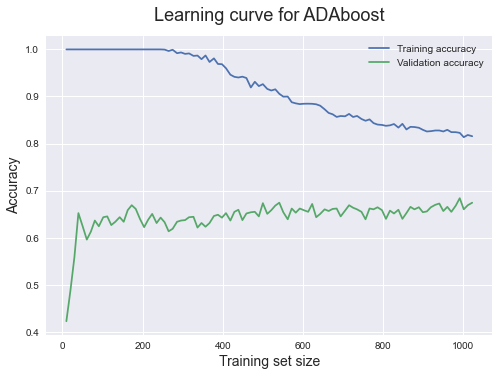

In [41]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
plt.plot(train_sizes, train_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for ADAboost', fontsize = 18, y = 1.03)
plt.legend();

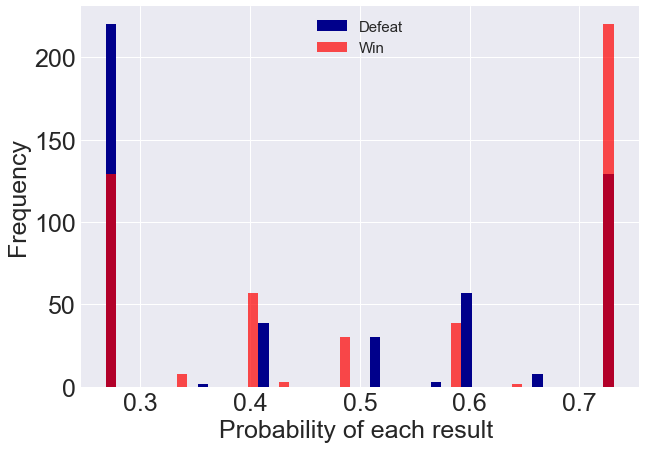

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(df_plot.iloc[:, 0], bins=50, label='Defeat', color='darkblue')
plt.hist(df_plot.iloc[:, 1], bins=50, label='Win', alpha=0.7, color='red')
plt.xlabel('Probability of each result ', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [43]:
y_labels = clf.predict(X_test)

In [44]:
plott = [y_test, y_labels]

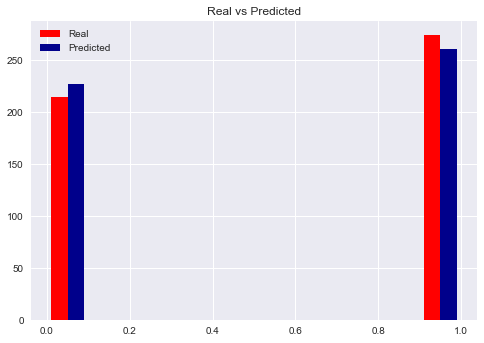

In [45]:
#Plot Real vs Predict
colors = ['red', 'darkblue']
labels = ['Real', 'Predicted']

plt.hist(plott, label=labels, color=colors, histtype='bar')
plt.title("Real vs Predicted")
plt.legend(loc='best')
plt.show()

In [46]:
# optimal treshhold

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
predictions_test = clf.predict(X_test)

false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_pred_test)

optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred_test]

In [48]:
# optimal treshhold
optimal_proba_cutoff

0.5855139645743273

In [49]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_test, predictions_test), accuracy_score(y_test, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_test, predictions_test), precision_score(y_test, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_test, predictions_test), recall_score(y_test, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_test, predictions_test), f1_score(y_test, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.7110655737704918, 0.7110655737704918
Precision Score Before and After Thresholding: 0.7547892720306514, 0.7547892720306514
Recall Score Before and After Thresholding: 0.718978102189781, 0.718978102189781
F1 Score Before and After Thresholding: 0.7364485981308411, 0.7364485981308411
